## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

## Testing equation

$$ 
\begin{cases} 
    x' = -y\\
    y' = x \\
    x(0) = 1 \\
    y(0) = 1
\end{cases}
$$
$$
x_{ex}(t) = \cos(t) - \sin(t)\\
y_{ex}(t) = \cos(t) + \sin(t)
$$

## Hyperparameters

In [2]:
T = 6.3
dt = 0.02
u0 = [1, 1]
def f(v, t): return np.array([-v[1], v[0]])
def u_ex(t): return np.cos(t)-np.sin(t)
def v_ex(t): return np.cos(t)+np.sin(t)

## Theta Method

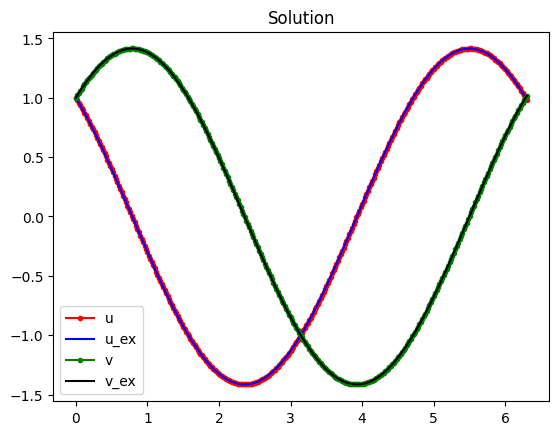

In [3]:
from particle.thetamethod import ThetaMethod

theta = 0.5
tol = 1e-2

TM = ThetaMethod(eqtype='ODE', final_time=T, time_step=dt, u0=u0, f=f, theta=theta, tol=tol)

TM.generate()

plt.plot(TM.t, TM.u[0, :], 'r.-')
plt.plot(TM.t, u_ex(TM.t), 'b-')
plt.plot(TM.t, TM.u[1, :], 'g.-')
plt.plot(TM.t, v_ex(TM.t), 'k-')
plt.title("Solution")
plt.legend(['u', 'u_ex', 'v', 'v_ex'])
plt.show()

## Runge-Kutta

### Explicit

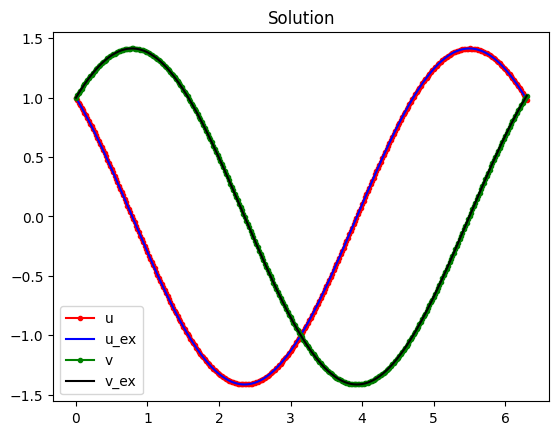

In [4]:
from particle.rungekutta import RKExplicit

A = np.array([[0, 0], [0.5, 0]], dtype=np.float32)
b = np.array([0, 1], dtype=np.float32)
c = np.array([0, 0.5], dtype=np.float32)

RK = RKExplicit(eqtype='ODE', final_time=T, time_step=dt, u0=u0, f=f, A=A,b=b,c=c,)

RK.generate()

plt.plot(RK.t, RK.u[0, :], 'r.-')
plt.plot(RK.t, u_ex(RK.t), 'b-')
plt.plot(RK.t, RK.u[1, :], 'g.-')
plt.plot(RK.t, v_ex(RK.t), 'k-')
plt.title("Solution")
plt.legend(['u', 'u_ex','v', 'v_ex'])
plt.show()

### Implicit

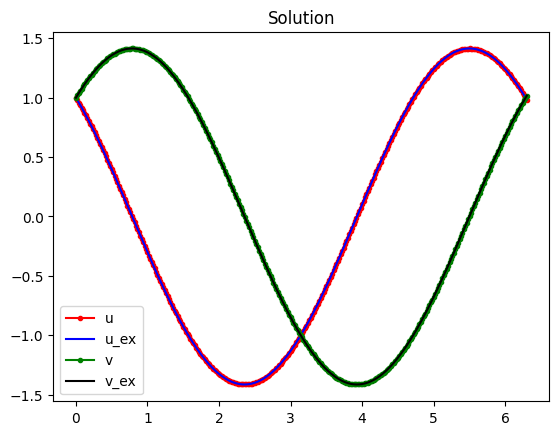

In [5]:
from particle.rungekutta import RKImplicit

A = np.array([[0.5, -0.5], [0.5, 0.5]], dtype=np.float32)
b = np.array([0.5, 0.5], dtype=np.float32)
c = np.array([0, 1], dtype=np.float32)

RK = RKImplicit(eqtype="ODE", final_time=T, time_step=dt, u0=u0, f=f, A=A, b=b, c=c)

RK.generate()

plt.plot(RK.t, RK.u[0, :], "r.-")
plt.plot(RK.t, u_ex(RK.t), "b-")
plt.plot(RK.t, RK.u[1, :], "g.-")
plt.plot(RK.t, v_ex(RK.t), "k-")
plt.title("Solution")
plt.legend(["u", "u_ex", "v", "v_ex"])
plt.show()

### Semi-Implicit

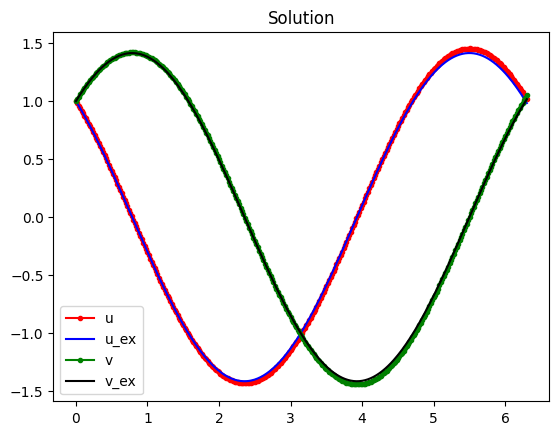

In [6]:
from particle.rungekutta import RKSemiImplicit

A = np.array([[0, 0], [0.5, 0.5]], dtype=np.float32)
b = np.array([0.5, 0.5], dtype=np.float32)
c = np.array([0, 1], dtype=np.float32)

RK = RKSemiImplicit(eqtype="ODE", final_time=T, time_step=dt, u0=u0, f=f, A=A, b=b, c=c)

RK.generate()

plt.plot(RK.t, RK.u[0, :], 'r.-')
plt.plot(RK.t, u_ex(RK.t), 'b-')
plt.plot(RK.t, RK.u[1, :], 'g.-')
plt.plot(RK.t, v_ex(RK.t), 'k-')
plt.title("Solution")
plt.legend(['u', 'u_ex','v', 'v_ex'])
plt.show()

## Multistep

### Adams-Bashforth

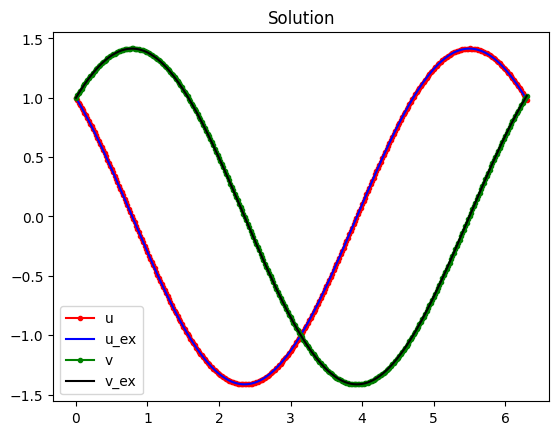

In [7]:
from particle.multistep import AdamsBashforth

order = 4

MS = AdamsBashforth(eqtype="ODE", final_time=T, time_step=dt, u0=u0, f=f, order=order)

MS.generate()

plt.plot(MS.t, MS.u[0, :], 'r.-')
plt.plot(MS.t, u_ex(MS.t), 'b-')
plt.plot(MS.t, MS.u[1, :], 'g.-')
plt.plot(MS.t, v_ex(MS.t), 'k-')
plt.title("Solution")
plt.legend(['u', 'u_ex','v', 'v_ex'])
plt.show()